* No food because it's not relevant
* No hunger 
* No new babies (it's not about that anymore)
* efssentially, stable population that doesn't exchange 
* add a vector of who's healthy and who's not
* start with patient 0
* infection based on minimal distance
...

for every person:
    If infected:
        Calculate distances to every other person 
        find all other agents that are closer than the threshold
        infect them!
...
* Output: New cases per tick as a function of time 
* Running the visualization: healthy are black; infected are red
* Parameter to model social distancing (something that turns them solitory if 0, or super-mixing together if one):

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals = 200
        self.n_trials = 200  # Original n_animals
        self.n_steps = 1000
        self.vmin = 0
        self.vmax = 1
        self.arena_size = 1
        self.speed = 0.01
        self.contagion_distance = 0.01**2


In [6]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 #Patient zero 
        
        
        
        stats = np.zeros(c.n_steps)
        

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed 
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            x = np.maximum(0,np.minimum(x, 1)) # Keep them in enclosure 
            y = np.maximum(0,np.minimum(y, 1))
            
            
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
            
                # vvv---------------But this little trick below makes things 10 times faster!!!
               # d = np.square(foodx-x[i_animal]) + np.square(foody-y[i_animal])
               # food_list = np.argwhere(d < c.eating_distance)
               # hp[i_animal] += food_list.size*c.hp_food
               # foodx[food_list] = -1
            
            stats[t] = 0
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0],y[infected==0],'k.', markersize=5)
                plt.plot(x[infected==1],y[infected==1],'r.', markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = c.n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


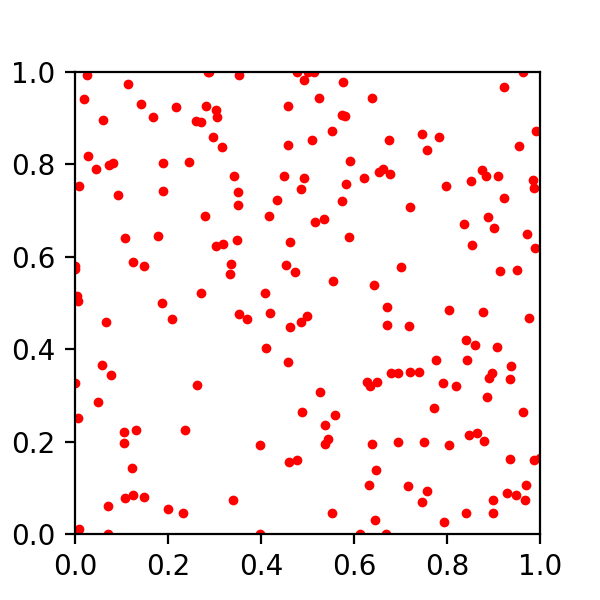

CPU times: user 59 s, sys: 1.64 s, total: 1min
Wall time: 1min


<IPython.core.display.Javascript object>


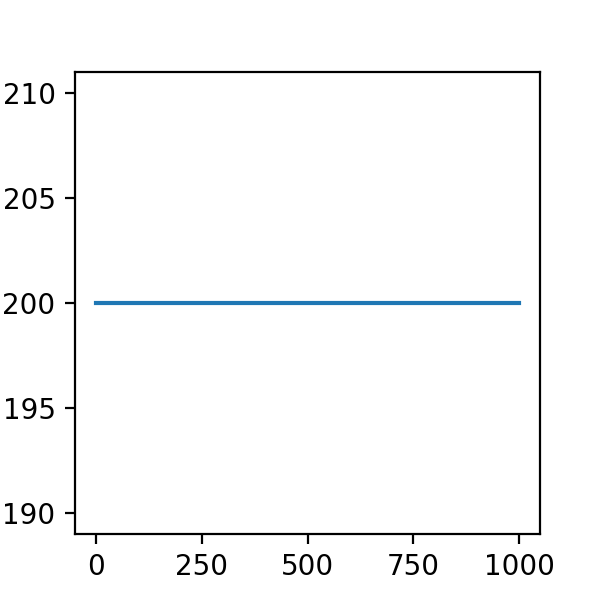

In [7]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(curve)